In [1]:
%load_ext autoreload
%autoreload 2
%tb

No traceback available to show.


In [43]:
import networkx as nx
from graph2plan.dcel.external import fully_embed_graph
from graph2plan.dual.helpers import split_cardinal_and_interior_nodes
from graph2plan.fourtp.faces import get_external_face
from graph2plan.fourtp.tests import test_four_complete, test_co, test_external_face
from graph2plan.dcel.original import create_embedding
from graph2plan.dual.helpers import split_cardinal_and_interior_edges
from graph2plan.fourtp.faces import get_embedding_of_four_complete_G

from copy import deepcopy

from graph2plan.dual.helpers import get_embedding_faces
from graph2plan.dcel.interfaces import Edge, EdgeList
from graph2plan.helpers.geometry_interfaces import CoordinateList


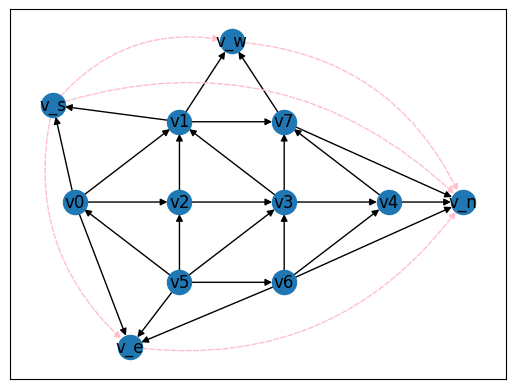

In [3]:
G, pos, full_pos =  test_four_complete()

In [9]:
all([True, True, True])

True

updating nbs of vertex v_s: ['v0', 'v1', 'v_w', 'v_n']
updating nbs of vertex v_e: ['v5', 'v0', 'v6', 'v_n']
v0 is potential next
-----Initialization complete---
3 12
v0 is potential next
>>Biconnection check: Skipping, >=3 vertices in Gk-1, currently have ['v_e', 'v_s']...
Did not get expected number of faces. Is the embedding correct? Nodes 3, edges 3 | faces=1 != exp_faces=2
>>Ck check: passed
updating nbs of vertex v0: ['v5', 'v1', 'v2']
incrementing k from 3 to 4
v5 is potential next
v1 is potential next
v_n is potential next
Multiple potential: ['v5', 'v1', 'v_n']. Choosing v5
>>Biconnection check: passed
>>Ck check: passed
updating nbs of vertex v5: ['v2', 'v3', 'v6']
incrementing k from 4 to 5
v2 is potential next
v6 is potential next
v1 is potential next
v_n is potential next
Multiple potential: ['v2', 'v6', 'v1', 'v_n']. Choosing v2
>>Biconnection check: passed
>>Ck check: passed
updating nbs of vertex v2: ['v1', 'v3']
incrementing k from 5 to 6
v3 is potential next
v6 is pot

AssertionError: Len of external faces > 1: []

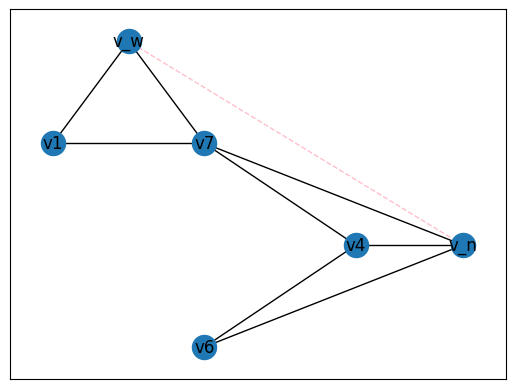

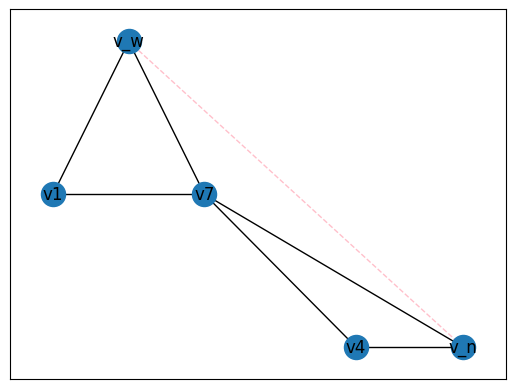

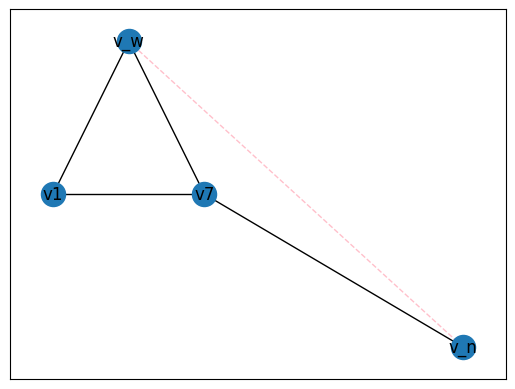

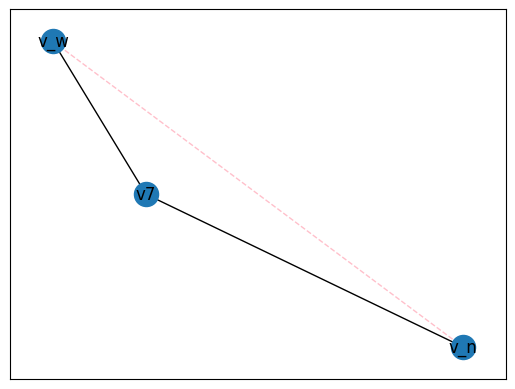

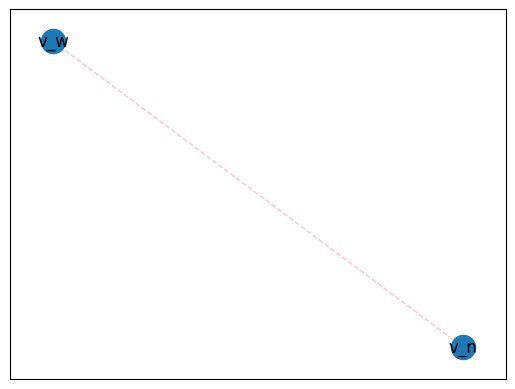

In [58]:
G_c, co = test_co()

EdgeView([('v2', 'v1'), ('v2', 'v3'), ('v3', 'v1'), ('v3', 'v7'), ('v3', 'v4'), ('v3', 'v6'), ('v6', 'v4'), ('v4', 'v7'), ('v1', 'v7'), ('v1', 'v_w'), ('v7', 'v_w')])

In [28]:
C_unmarked = nx.cycle_graph(G_c.outer_face_of_unmarked(co))
C_unmarked


==>> other_faces: {Face(vertices=['v3', 'v4', 'v6']), Face(vertices=['v3', 'v1', 'v7']), Face(vertices=['v3', 'v7', 'v4']), Face(vertices=['v2', 'v3', 'v6', 'v4', 'v7', 'v_w', 'v1']), Face(vertices=['v2', 'v1', 'v3']), Face(vertices=['v1', 'v_w', 'v7'])}


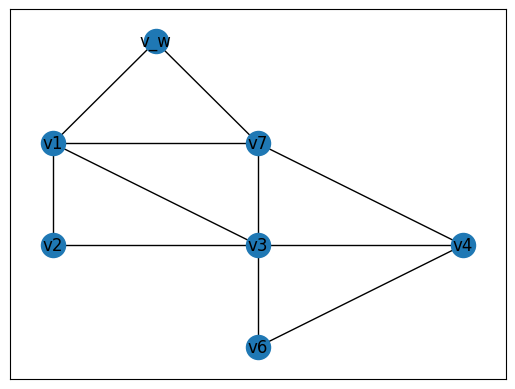

In [31]:
G_unmarked = G_c.G.subgraph(co.unmarked)
nx.draw_networkx(G_unmarked, G_c.full_pos)

In [48]:
def neighborhood(G, node, n):
    path_lengths = nx.single_source_dijkstra_path_length(G, node)
    return [node for node, length in path_lengths.items()
                    if length == n]

In [51]:
neighborhood(G, "v2", 2) + neighborhood(G, "v2", 1)

['v7', 'v_s', 'v_w', 'v4', 'v1', 'v3']

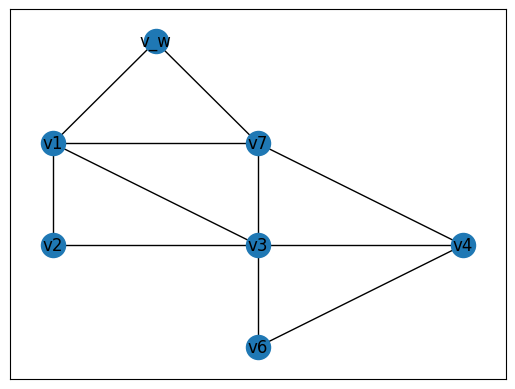

In [32]:
G_unmarked_cyle_nodes = G_unmarked.subgraph(C_unmarked.nodes)
nx.draw_networkx(G_unmarked_cyle_nodes, G_c.full_pos)

In [29]:
from graph2plan.helpers.utils import set_difference


In [41]:
a = [('v7', 'v_w'), ('v_w', 'v1')]
b = [('v3', 'v8'), ('v1', 'v_w')]
set([frozenset(i) for i in a])

{frozenset({'v1', 'v_w'}), frozenset({'v7', 'v_w'})}

In [42]:
set([frozenset(i) for i in b])

{frozenset({'v1', 'v_w'}), frozenset({'v3', 'v8'})}

In [34]:
C_unmarked.edges

EdgeView([('v2', 'v3'), ('v2', 'v1'), ('v3', 'v6'), ('v6', 'v4'), ('v4', 'v7'), ('v7', 'v_w'), ('v_w', 'v1')])

In [45]:
chords = set_difference(EdgeList.to_edge_list(G_unmarked_cyle_nodes.edges).edges, EdgeList.to_edge_list(C_unmarked.edges).edges)
chords

[Edge(u='v3', v='v1', ix=0, pair_num=1),
 Edge(u='v3', v='v4', ix=0, pair_num=1),
 Edge(u='v1', v='v7', ix=0, pair_num=1),
 Edge(u='v3', v='v7', ix=0, pair_num=1)]

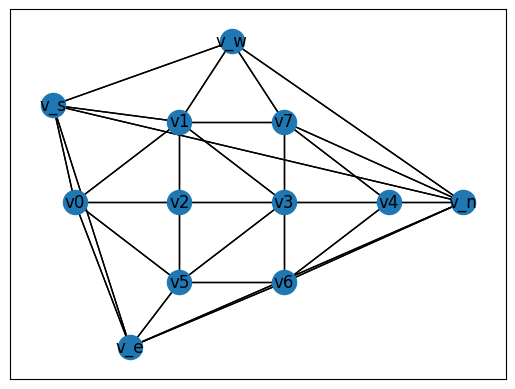

In [11]:
PE = get_embedding_of_four_complete_G(G, full_pos)
nx.draw_networkx(PE, full_pos)

In [13]:
nx.is_chordal(PE.to_undirected())

False

In [5]:
nodes = ["v1", "v7", "v3", "v2"]
PE.remove_nodes_from(nodes)


In [6]:
PE.traverse_face("v_s", "v_w")

['v_s', 'v_w', 'v_n', 'v4', 'v6', 'v5', 'v0']

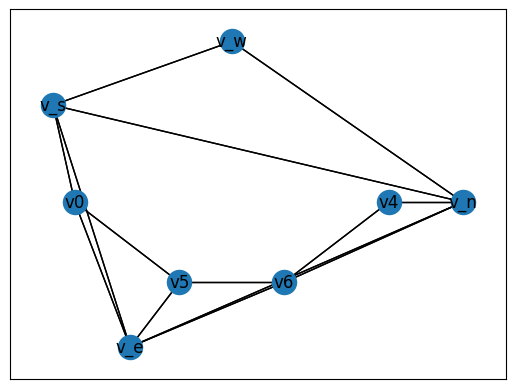

In [ ]:
n

In [28]:
PE.remove_nodes_from(nodes)

In [7]:
from graph2plan.helpers.utils import set_difference


set_difference(PE.nodes, nodes)

['v_n', 'v4', 'v_s', 'v5', 'v_w', 'v_e', 'v0', 'v6']

In [18]:
faces = get_external_face(PE)
faces
# calculate the area for all.. 

{Face(vertices=['v0', 'v1', 'v2']),
 Face(vertices=['v0', 'v_e', 'v_s']),
 Face(vertices=['v0', 'v_s', 'v1']),
 Face(vertices=['v1', 'v_s', 'v_w']),
 Face(vertices=['v1', 'v_w', 'v7']),
 Face(vertices=['v2', 'v1', 'v3']),
 Face(vertices=['v3', 'v1', 'v7']),
 Face(vertices=['v3', 'v4', 'v6']),
 Face(vertices=['v3', 'v7', 'v4']),
 Face(vertices=['v5', 'v0', 'v2']),
 Face(vertices=['v5', 'v2', 'v3']),
 Face(vertices=['v5', 'v3', 'v6']),
 Face(vertices=['v5', 'v6', 'v_e']),
 Face(vertices=['v5', 'v_e', 'v0']),
 Face(vertices=['v6', 'v4', 'v_n']),
 Face(vertices=['v6', 'v_n', 'v_e']),
 Face(vertices=['v7', 'v_n', 'v4']),
 Face(vertices=['v7', 'v_w', 'v_n']),
 Face(vertices=['v_e', 'v_n', 'v_s']),
 Face(vertices=['v_s', 'v_n', 'v_w'])}

In [23]:
sorted(faces, key=lambda x: x.get_area(full_pos), reverse=True)[0]

Face(vertices=['v_e', 'v_n', 'v_s'])

In [21]:
for face in faces:
    print(face.vertices, face.get_area(full_pos))

['v5', 'v0', 'v2'] 0.5
['v3', 'v1', 'v7'] 0.5
['v5', 'v2', 'v3'] 0.5
['v7', 'v_n', 'v4'] 0.35355339059327373
['v_e', 'v_n', 'v_s'] 5.450465965918462
['v6', 'v4', 'v_n'] 0.35355339059327373
['v0', 'v1', 'v2'] 0.5
['v3', 'v4', 'v6'] 0.5
['v0', 'v_s', 'v1'] 0.7071067811865475
['v5', 'v_e', 'v0'] 0.6380711874576983
['v1', 'v_w', 'v7'] 0.5
['v5', 'v6', 'v_e'] 0.40236892706218247
['v6', 'v_n', 'v_e'] 0.048815536468908904
['v0', 'v_e', 'v_s'] 0.13214886980224208
['v1', 'v_s', 'v_w'] 0.6553300858899106
['v5', 'v3', 'v6'] 0.5
['v_s', 'v_n', 'v_w'] 2.5821067811865475
['v2', 'v1', 'v3'] 0.5
['v3', 'v7', 'v4'] 0.5
['v7', 'v_w', 'v_n'] 0.6035533905932737
